# About Dataset

The dataset contains EEG signals from 11 subjects with labels of alert and drowsy. It can be opened with Matlab. We extracted the data for our own research purpose from another public dataset:

Cao, Z., et al., Multi-channel EEG recordings during a sustained-attention driving task. Scientific data, 2019. 6(1): p. 1-8.

If you find the dataset useful, please give credits to their works.

The details on how the data were extracted are described in our paper:

"Jian Cui, Zirui Lan, Yisi Liu, Ruilin Li, Fan Li, Olga Sourina, Wolfgang Müller-Wittig, A Compact and Interpretable Convolutional Neural Network for Cross-Subject Driver Drowsiness Detection from Single-Channel EEG, Methods, 2021, ISSN 1046-2023, https://doi.org/10.1016/j.ymeth.2021.04.017."

The codes of the paper above are accessible from:

https://github.com/cuijiancorbin/A-Compact-and-Interpretable-Convolutional-Neural-Network-for-Single-Channel-EEG

The data file contains 3 variables and they are EEGsample, substate and subindex.

"EEGsample" contains 2022 EEG samples of size 20x384 from 11 subjects. Each sample is a 3s EEG data with 128Hz from 30 EEG channels.
"subindex" is an array of 2022x1. It contains the subject indexes from 1-11 corresponding to each EEG sample.
"substate" is an array of 2022x1. It contains the labels of the samples. 0 corresponds to the alert state and 1 correspond to the drowsy state.

The unbalanced version of this dataset is accessible from:
https://figshare.com/articles/dataset/EEG_driver_drowsiness_dataset_unbalanced_/16586957

# Importing Libraires 

In [1]:
import scipy.io
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt

# Loading Dataset

In [2]:
import scipy.io

# Load the data from the provided .mat file
file_path = 'EEG driver drowsiness dataset.mat'
mat_data = scipy.io.loadmat(file_path)

# Inspecting the keys and structure of the loaded data
mat_data.keys(), {key: type(mat_data[key]) for key in mat_data.keys()}

(dict_keys(['__header__', '__version__', '__globals__', 'EEGsample', 'subindex', 'substate']),
 {'__header__': bytes,
  '__version__': str,
  '__globals__': list,
  'EEGsample': numpy.ndarray,
  'subindex': numpy.ndarray,
  'substate': numpy.ndarray})

In [3]:
# Inspecting the shape and content of the EEGsample, subindex, and substate arrays
eeg_sample_shape = mat_data['EEGsample'].shape
subindex_shape = mat_data['subindex'].shape
substate_shape = mat_data['substate'].shape

eeg_sample_shape, subindex_shape, substate_shape

((2022, 30, 384), (2022, 1), (2022, 1))

In [4]:
print(mat_data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Dec 12 16:15:31 2019', '__version__': '1.0', '__globals__': [], 'EEGsample': array([[[ 4.08097622e+00,  5.36373657e+00,  2.16892286e+00, ...,
         -2.43467111e+00, -1.08033326e+01, -4.06570287e+00],
        [ 3.78602291e+00,  6.18806022e+00,  1.72710622e+00, ...,
         -2.23788269e+00, -1.08040545e+01, -3.16985550e+00],
        [ 8.34680437e+00,  8.69160090e+00, -1.09056499e-02, ...,
          2.30521997e+00, -1.33921422e+01, -5.27739673e+00],
        ...,
        [ 1.52884814e+00,  7.93795880e-01, -1.45126572e+00, ...,
         -1.22710349e+00, -5.26310889e+00, -1.22684549e+00],
        [-1.19949821e+00, -1.54496214e+00, -4.31985930e+00, ...,
         -5.32550694e+00, -5.48814272e+00, -1.57636907e+00],
        [ 1.59400945e+00,  1.90051435e+00, -4.64426331e+00, ...,
         -3.48251971e+00, -2.09547756e+00,  4.01980667e+00]],

       [[ 5.10435476e+00,  2.66309990e-01,  3.92736106e+00, ...,
         -2.43

# EEGsample

In [5]:
eeg_sample_shape

(2022, 30, 384)

#### "EEGsample" contains 2022 EEG samples of size 20x384 from 11 subjects. Each sample is a 3s EEG data with 128Hz from 30 EEG channels.

# Subindex

In [6]:
subindex_shape

(2022, 1)

#### "subindex" is an array of 2022x1. It contains the subject indexes from 1-11 corresponding to each EEG sample. 

# Substate

In [7]:
substate_shape

(2022, 1)

#### "substate" is an array of 2022x1. It contains the labels of the samples. 0 corresponds to the alert state and 1 correspond to the drowsy state.

# Analyzing EEG Data: Determining Sample Shape, Channel Count, and Duration

In [8]:
# Access the EEG data and other relevant information
data = mat_data
eeg_samples = data['EEGsample']
subindex = data['subindex']
substate = data['substate']



num_samples, num_channels, num_time_points = eeg_sample_shape
subject_indexes = mat_data['subindex'].flatten()
labels = mat_data['substate'].flatten()

### Calculate the duration of each sample in seconds

In [9]:
# Calculate the duration of each sample in seconds
sampling_rate = 128  # Hz
sample_duration = num_time_points / sampling_rate

In [10]:
print("Number of subjects:", len(np.unique(subject_indexes)))
print("EEGsample shape:", eeg_sample_shape)
print("Number of Samples:", num_samples)
print("Number of Channels:", num_channels)
print("Number of Time Points:", num_time_points)
print("Sample Duration (seconds):", sample_duration)

unique_labels, label_counts = np.unique(labels, return_counts=True)
print("Unique labels:", unique_labels)
print("Label counts:", label_counts) 

Number of subjects: 11
EEGsample shape: (2022, 30, 384)
Number of Samples: 2022
Number of Channels: 30
Number of Time Points: 384
Sample Duration (seconds): 3.0
Unique labels: [0 1]
Label counts: [1011 1011]


# Compute basic statistics for each EEG channel

In [11]:
# Compute basic statistics for each EEG channel
mean_values = np.mean(eeg_samples, axis=(0, 2))  # Compute mean along subjects and timepoints
std_values = np.std(eeg_samples, axis=(0, 2))    # Compute standard deviation along subjects and timepoints
min_values = np.min(eeg_samples, axis=(0, 2))    # Compute minimum along subjects and timepoints
max_values = np.max(eeg_samples, axis=(0, 2))    # Compute maximum along subjects and timepoints

# Display basic statistics for each EEG channel
for channel_index in range(num_channels):
    print("Channel {}: Mean: {:.4f}, Std: {:.4f}, Min: {:.4f}, Max: {:.4f}".format(
        channel_index + 1, mean_values[channel_index], std_values[channel_index],
        min_values[channel_index], max_values[channel_index]
    ))

Channel 1: Mean: -0.0216, Std: 14.6210, Min: -573.2365, Max: 871.9078
Channel 2: Mean: -0.0408, Std: 14.9052, Min: -1299.3223, Max: 911.1531
Channel 3: Mean: -0.0046, Std: 9.6717, Min: -208.1605, Max: 243.2860
Channel 4: Mean: -0.0555, Std: 23.2757, Min: -1302.3108, Max: 1795.5439
Channel 5: Mean: -0.0682, Std: 10.7254, Min: -259.1864, Max: 157.8684
Channel 6: Mean: -0.0663, Std: 22.3244, Min: -1914.6017, Max: 1294.2410
Channel 7: Mean: -0.0535, Std: 11.2602, Min: -496.5066, Max: 754.2102
Channel 8: Mean: -0.0116, Std: 8.9256, Min: -257.1262, Max: 178.2628
Channel 9: Mean: -0.0536, Std: 10.5208, Min: -264.4460, Max: 358.2625
Channel 10: Mean: -0.0603, Std: 11.0738, Min: -170.1104, Max: 172.7116
Channel 11: Mean: -0.0571, Std: 10.8091, Min: -220.8742, Max: 281.4221
Channel 12: Mean: -0.0451, Std: 9.3398, Min: -249.3489, Max: 203.9866
Channel 13: Mean: 0.1597, Std: 88.7564, Min: -3195.4259, Max: 3430.9080
Channel 14: Mean: -0.0544, Std: 10.0442, Min: -259.9218, Max: 369.9024
Channel 15: 

# Check for missing values

In [12]:
# Check for missing values
missing_values = np.isnan(eeg_samples).sum()
if missing_values == 0:
    print("No missing values in the EEG data.")
else:
    print("Number of missing values:", missing_values)

No missing values in the EEG data.


# Compute summary statistics of EEG Signal

In [13]:
# Compute summary statistics of EEG Signal
mean_amplitude = np.mean(eeg_sample_shape)
median_amplitude = np.median(eeg_sample_shape)
std_deviation = np.std(eeg_sample_shape)
quartiles = np.percentile(eeg_sample_shape, [25, 50, 75])

print("Summary Statistics of EEG Signal:")
print("Mean Amplitude:", mean_amplitude)
print("Median Amplitude:", median_amplitude)
print("Standard Deviation:", std_deviation)
print("Quartiles (25th, 50th, 75th):", quartiles)

Summary Statistics of EEG Signal:
Mean Amplitude: 812.0
Median Amplitude: 384.0
Standard Deviation: 867.718848475703
Quartiles (25th, 50th, 75th): [ 207.  384. 1203.]


# Data Visualization

# Time-domain Visualization

### Function to plot EEG sample

In [14]:
def plot_eeg_sample(eeg_data, sample_rate, title):
    plt.figure(figsize=(15, 6))
    for i in range(eeg_data.shape[0]):
        plt.plot(np.arange(eeg_data.shape[1]) / sample_rate, eeg_data[i, :] + i*100, label=f'Channel {i+1}')
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

### Selecting parameter for Alert and Drowsy states

In [15]:
alert_sample = eeg_samples[substate.ravel() == 0][0]  # First sample of alert state
drowsy_sample = eeg_samples[substate.ravel() == 1][0]  # First sample of drowsy state
sample_rate = 128  # Sampling rate

# Plotting time-domain representations

## Time-domain Alert State

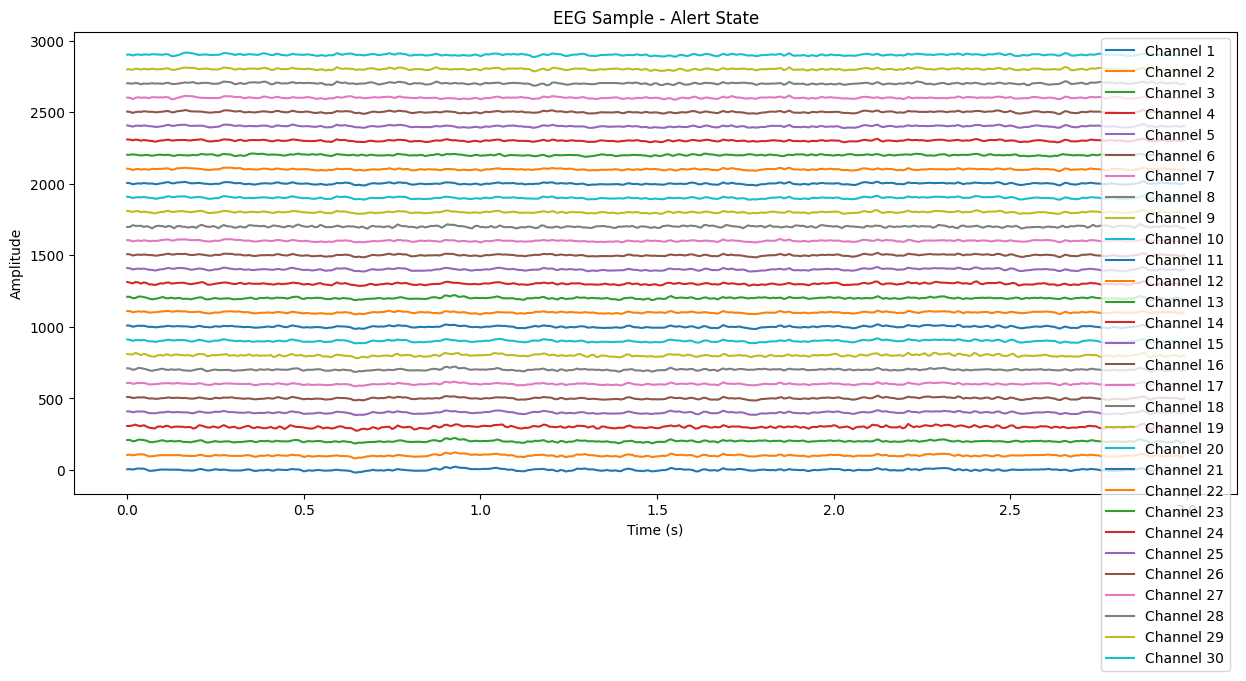

In [16]:
plot_eeg_sample(alert_sample, sample_rate, 'EEG Sample - Alert State')

## Time-domain Drowsy State

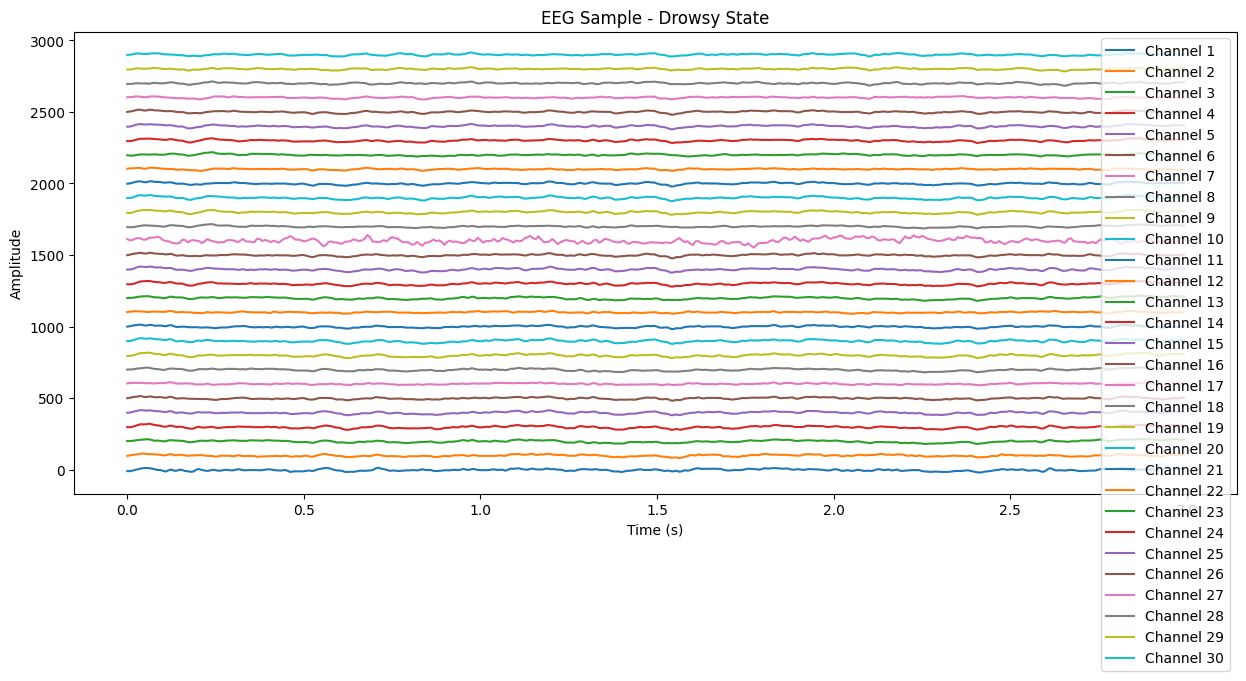

In [17]:
plot_eeg_sample(drowsy_sample, sample_rate, 'EEG Sample - Drowsy State')

In [19]:
# Extract the EEG samples, subject index, and state labels
EEG_samples = data['EEGsample']
subject_indices = data['subindex'].flatten()
state_labels = data['substate'].flatten()

# Calculate mean and standard deviation for each EEG channel across all samples
mean_EEG = np.mean(EEG_samples, axis=(0, 2))  # Averaging across samples and time points
std_EEG = np.std(EEG_samples, axis=(0, 2))  # Standard deviation across samples and time points

# Separate the data based on alert (0) and drowsy (1) states
alert_EEG = EEG_samples[state_labels == 0]
drowsy_EEG = EEG_samples[state_labels == 1]

# Calculate mean and std for each state
mean_alert = np.mean(alert_EEG, axis=(0, 2))
std_alert = np.std(alert_EEG, axis=(0, 2))
mean_drowsy = np.mean(drowsy_EEG, axis=(0, 2))
std_drowsy = np.std(drowsy_EEG, axis=(0, 2))

mean_EEG.shape, std_EEG.shape, mean_alert.shape, std_alert.shape, mean_drowsy.shape, std_drowsy.shape


((30,), (30,), (30,), (30,), (30,), (30,))

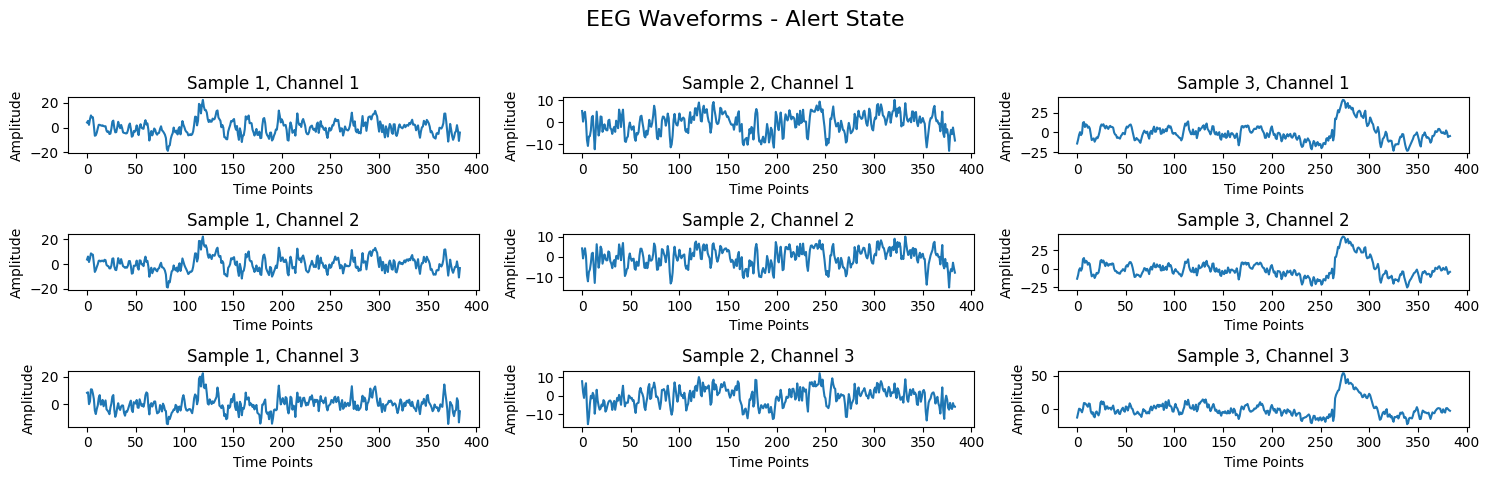

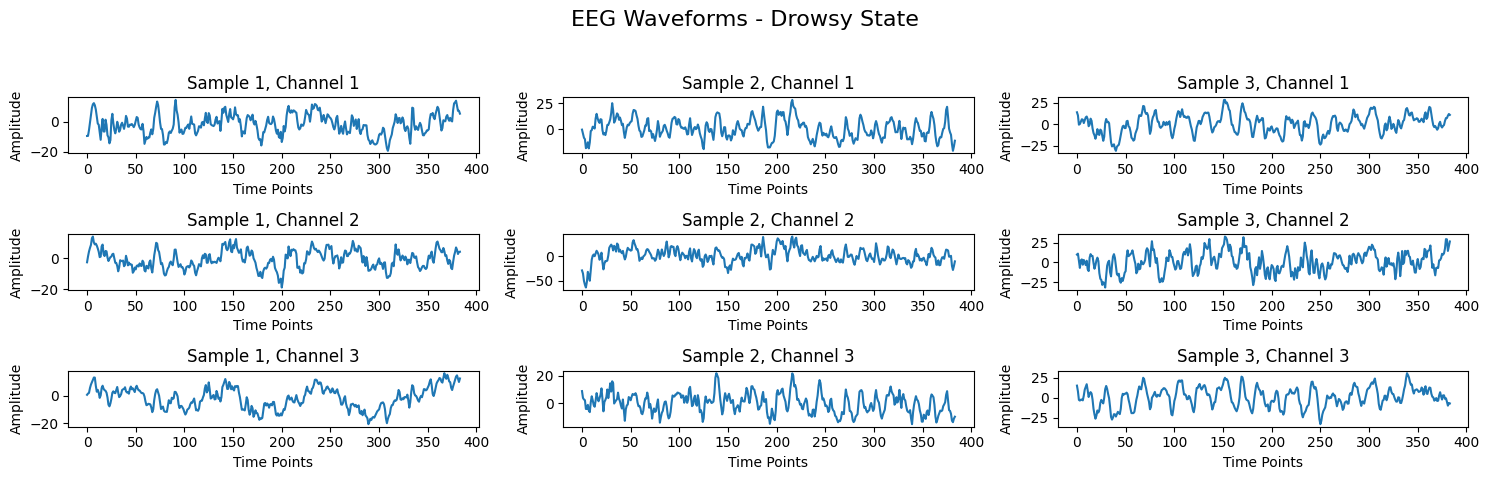

In [20]:
import matplotlib.pyplot as plt

# Function to plot EEG waveforms
def plot_eeg_waveforms(eeg_data, title, num_samples=5, channels=[0, 1, 2]):
    """
    Plot EEG waveforms for selected channels and samples.
    """
    fig, axes = plt.subplots(nrows=len(channels), ncols=num_samples, figsize=(15, 5))
    fig.suptitle(title, fontsize=16)

    for i, channel in enumerate(channels):
        for j in range(num_samples):
            axes[i, j].plot(eeg_data[j, channel, :])
            axes[i, j].set_title(f"Sample {j+1}, Channel {channel+1}")
            axes[i, j].set_xlabel('Time Points')
            axes[i, j].set_ylabel('Amplitude')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Select a few samples from both alert and drowsy states for plotting
num_samples_to_plot = 3
selected_alert_samples = alert_EEG[:num_samples_to_plot]
selected_drowsy_samples = drowsy_EEG[:num_samples_to_plot]

# Plotting
plot_eeg_waveforms(selected_alert_samples, "EEG Waveforms - Alert State", num_samples=num_samples_to_plot)
plot_eeg_waveforms(selected_drowsy_samples, "EEG Waveforms - Drowsy State", num_samples=num_samples_to_plot)


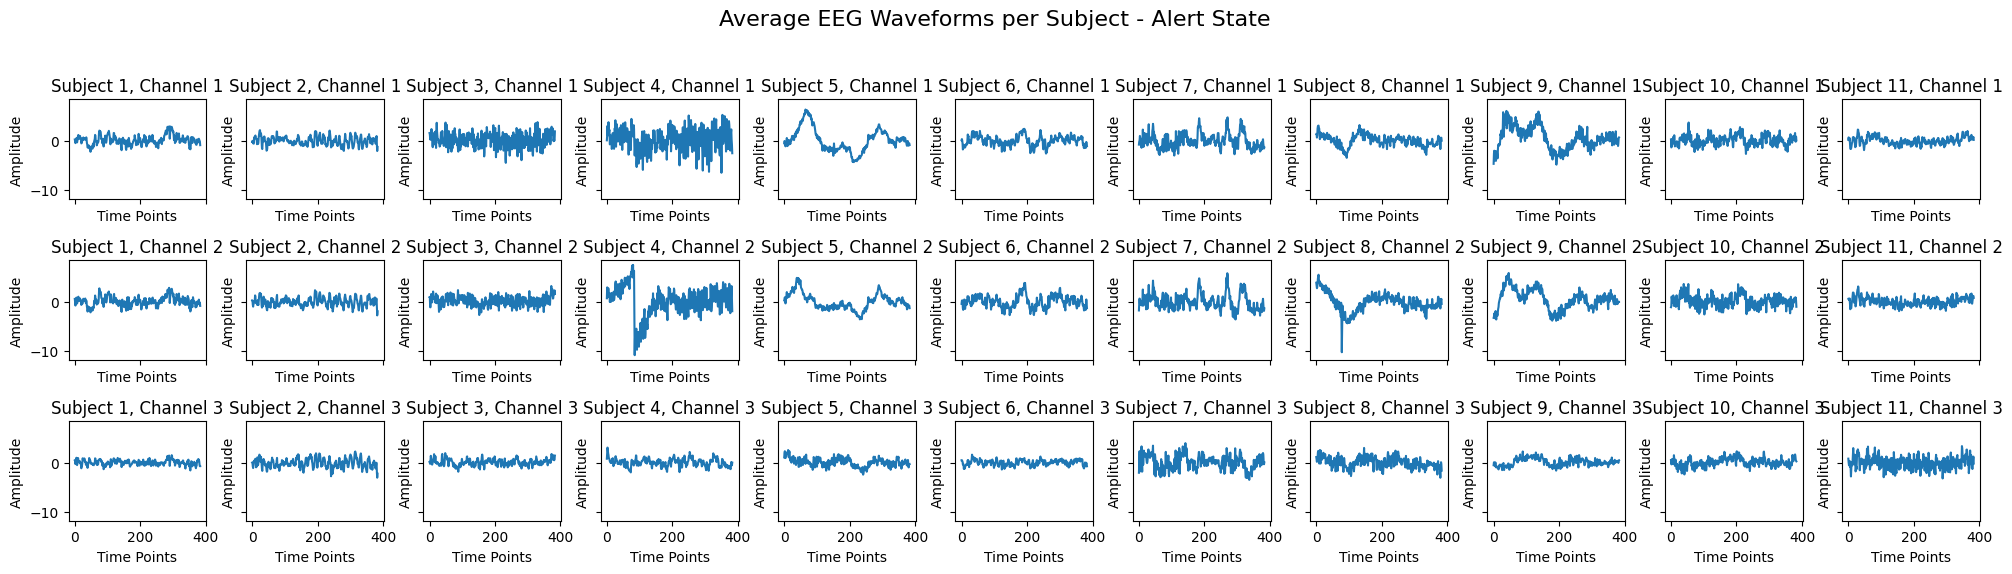

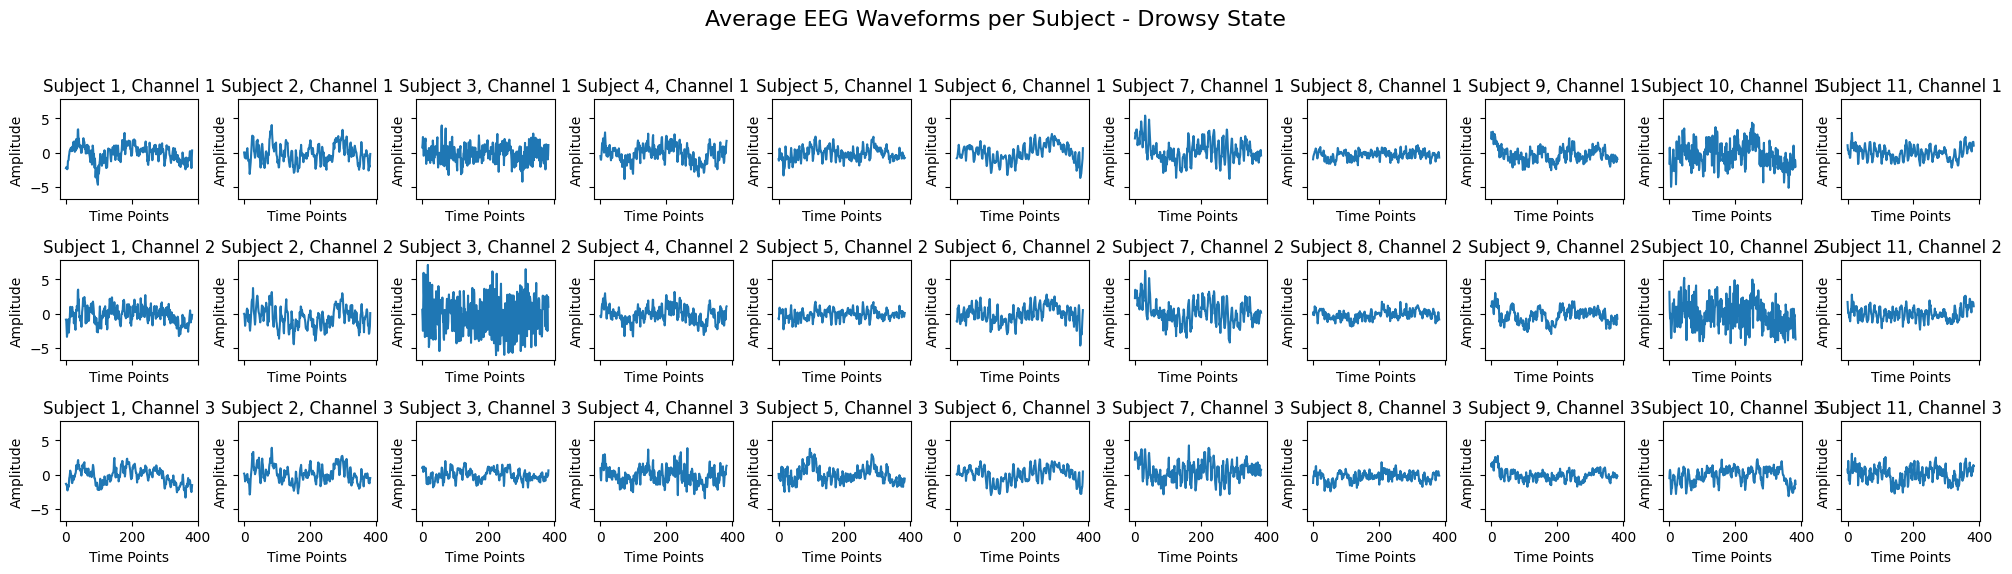

In [22]:
# Function to plot average EEG waveforms for each subject
def plot_avg_eeg_per_subject(eeg_data, subject_indices, title, channels=[0, 1, 2]):
    """
    Plot average EEG waveforms for selected channels for each subject.
    """
    subjects = np.unique(subject_indices)
    num_subjects = len(subjects)
    fig, axes = plt.subplots(nrows=len(channels), ncols=num_subjects, figsize=(20, 6), sharex=True, sharey=True)
    fig.suptitle(title, fontsize=16)

    for i, channel in enumerate(channels):
        for j, subject in enumerate(subjects):
            # Average EEG for each subject
            avg_eeg = np.mean(eeg_data[subject_indices == subject, channel, :], axis=0)
            axes[i, j].plot(avg_eeg)
            axes[i, j].set_title(f"Subject {subject}, Channel {channel+1}")
            axes[i, j].set_xlabel('Time Points')
            axes[i, j].set_ylabel('Amplitude')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Plotting average EEG waveforms per subject for both states
plot_avg_eeg_per_subject(alert_EEG, subject_indices[state_labels == 0], "Average EEG Waveforms per Subject - Alert State")
plot_avg_eeg_per_subject(drowsy_EEG, subject_indices[state_labels == 1], "Average EEG Waveforms per Subject - Drowsy State")


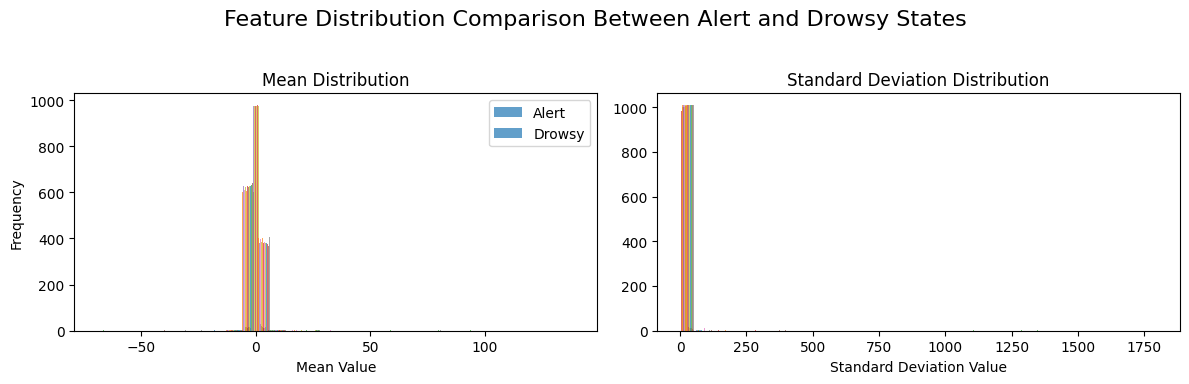

In [23]:
# Calculate the mean and standard deviation for each channel and sample in both states
mean_alert_per_sample = np.mean(alert_EEG, axis=2)  # Mean across time points for each sample
std_alert_per_sample = np.std(alert_EEG, axis=2)    # Std across time points for each sample

mean_drowsy_per_sample = np.mean(drowsy_EEG, axis=2)
std_drowsy_per_sample = np.std(drowsy_EEG, axis=2)

# Plotting the distributions of these features for the two states
def plot_feature_distribution(features, title, labels=['Alert', 'Drowsy']):
    """
    Plot histograms for the feature distributions in the two states.
    """
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    fig.suptitle(title, fontsize=16)

    axes[0].hist(features[0], bins=30, alpha=0.7, label=labels[0])
    axes[0].hist(features[1], bins=30, alpha=0.7, label=labels[1])
    axes[0].set_title('Mean Distribution')
    axes[0].set_xlabel('Mean Value')
    axes[0].set_ylabel('Frequency')
    axes[0].legend()

    axes[1].hist(features[2], bins=30, alpha=0.7, label=labels[0])
    axes[1].hist(features[3], bins=30, alpha=0.7, label=labels[1])
    axes[1].set_title('Standard Deviation Distribution')
    axes[1].set_xlabel('Standard Deviation Value')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_feature_distribution([mean_alert_per_sample, mean_drowsy_per_sample, std_alert_per_sample, std_drowsy_per_sample],
                          "Feature Distribution Comparison Between Alert and Drowsy States")


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Reshape the EEG data: Flatten the channel x time_points into a single vector per sample
X = EEG_samples.reshape(EEG_samples.shape[0], -1)  # Reshaping into 2D array
y = state_labels  # Labels (0: Alert, 1: Drowsy)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000)
}

# Training the models
model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    model_results[name] = (accuracy, report)

model_results


{'Logistic Regression': (0.5111111111111111,
  '              precision    recall  f1-score   support\n\n           0       0.49      0.52      0.51       195\n           1       0.53      0.50      0.52       210\n\n    accuracy                           0.51       405\n   macro avg       0.51      0.51      0.51       405\nweighted avg       0.51      0.51      0.51       405\n'),
 'Random Forest': (0.7234567901234568,
  '              precision    recall  f1-score   support\n\n           0       0.75      0.64      0.69       195\n           1       0.70      0.80      0.75       210\n\n    accuracy                           0.72       405\n   macro avg       0.73      0.72      0.72       405\nweighted avg       0.73      0.72      0.72       405\n'),
 'Support Vector Machine': (0.6222222222222222,
  '              precision    recall  f1-score   support\n\n           0       0.58      0.82      0.68       195\n           1       0.72      0.44      0.55       210\n\n    accuracy  

In [25]:
X

array([[  4.08097622,   5.36373657,   2.16892286, ...,  -3.48251971,
         -2.09547756,   4.01980667],
       [  5.10435476,   0.26630999,   3.92736106, ...,  12.99672124,
         10.22472341,   8.69885723],
       [-14.19768223,  -9.21751853,  -3.2526559 , ...,  -2.80517632,
          0.47189475,   0.267718  ],
       ...,
       [ 10.46229325,  11.89236173,  14.49453409, ...,  -1.32035689,
         -1.27834651,  -0.39362833],
       [ -3.12505298,  -0.64070656,   1.44206574, ...,   6.8158557 ,
          5.19124876,   1.81584282],
       [-13.73469238, -10.68540395, -10.33338853, ...,  -1.3382617 ,
         -0.30109547,   0.41252308]])

In [26]:
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Function to test stationarity
def test_stationarity(timeseries):
    """
    Perform Dickey-Fuller test:
    Null Hypothesis (H0): Time series is not stationary
    If Test Statistic < Critical Value, we reject H0.
    """
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    return dfoutput

# Selecting a single channel (for simplicity, let's choose the first channel)
selected_channel_data = EEG_samples[:, 0, :].flatten()  # Flatten the data to create a univariate time series

# Test stationarity
stationarity_test_results = test_stationarity(selected_channel_data)
stationarity_test_results


Test Statistic                    -85.368259
p-value                             0.000000
#Lags Used                        113.000000
Number of Observations Used    776334.000000
Critical Value (1%)                -3.430358
Critical Value (5%)                -2.861544
Critical Value (10%)               -2.566772
dtype: float64

In [27]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(selected_channel_data)


In [28]:
from statsmodels.tsa.stattools import adfuller

# Function to test stationarity
def test_stationarity(timeseries):
    """
    Perform Dickey-Fuller test:
    Null Hypothesis (H0): Time series is not stationary
    If Test Statistic < Critical Value, we reject H0.
    """
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    return dfoutput

# Selecting a single channel (for simplicity, let's choose the first channel)
selected_channel_data = EEG_samples[:, 0, :].flatten()  # Flatten the data to create a univariate time series

# Test stationarity
stationarity_test_results = test_stationarity(selected_channel_data)
stationarity_test_results


Test Statistic                    -85.368259
p-value                             0.000000
#Lags Used                        113.000000
Number of Observations Used    776334.000000
Critical Value (1%)                -3.430358
Critical Value (5%)                -2.861544
Critical Value (10%)               -2.566772
dtype: float64

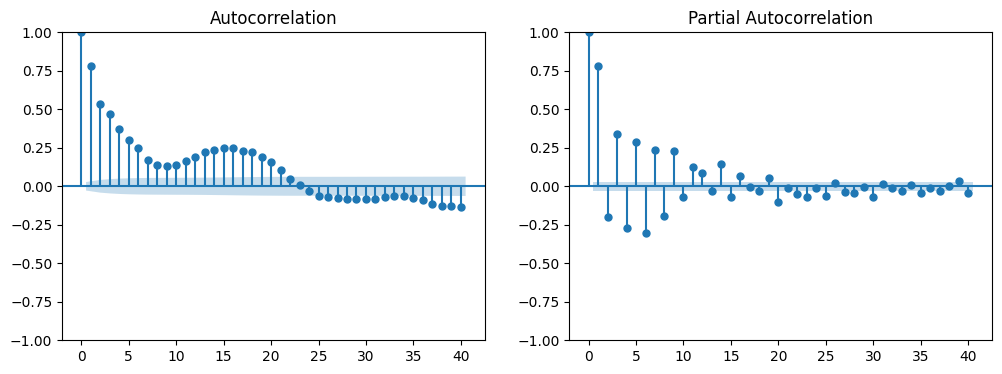

In [29]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Select a smaller sample for ACF and PACF to make it computationally feasible
sampled_data = selected_channel_data[:5000]  # Adjust the number based on computational capacity

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(sampled_data, lags=40, ax=axes[0])
plot_pacf(sampled_data, lags=40, ax=axes[1])
plt.show()


In [30]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model to the sampled data
# For demonstration purposes, we're fitting the model to the random data generated earlier
# You should fit the model to your selected EEG channel data

# ARIMA Model Parameters
p = 1  # AR component
d = 0  # Differencing order
q = 1  # MA component

# Initialize and fit the ARIMA model
arima_model = ARIMA(selected_channel_data, order=(p, d, q))
arima_result = arima_model.fit()

# Display the summary of the model
arima_result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:               776448
Model:                 ARIMA(1, 0, 1)   Log Likelihood            -2565952.918
Date:                Mon, 27 Nov 2023   AIC                        5131913.836
Time:                        11:40:01   BIC                        5131960.086
Sample:                             0   HQIC                       5131926.694
                             - 776448                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0216      0.039     -0.553      0.581      -0.098       0.055
ar.L1          0.6375   8.05e-05   7919.583      0.000       0.637       0.638
ma.L1          0.8879   4.05e-05   2.19e+04      0.000       0.888       0.888
sigma2        43.4494      0.007   6340.215      0.000      43.436      43.463
===================================================================================
Ljung-Box (L1) (Q):                8506.83   Jarque-Bera (JB):        1763435408.60
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                       236.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

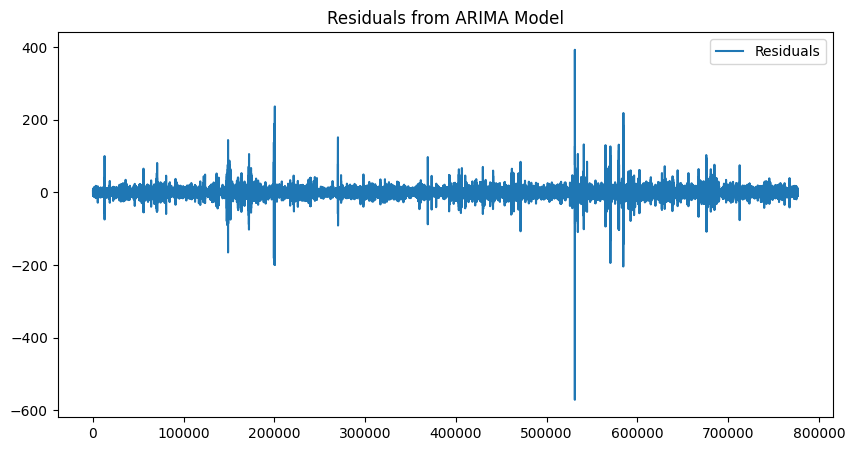

array([ 4.1025935 ,  2.0295136 , -2.3495211 ,  6.90746991,  0.36216013,
        1.59503172,  1.86189896, -5.38942601, -2.97118751,  0.52743563])

In [31]:
# Generate predictions using the ARIMA model
# For the purpose of this demonstration, we're using the model fitted to the random data generated earlier

# Predicting the same in-sample time points to obtain the residuals
predictions = arima_result.predict(start=0, end=len(selected_channel_data) - 1)
residuals = selected_channel_data - predictions

# Plot the residuals
plt.figure(figsize=(10, 5))
plt.plot(residuals, label='Residuals')
plt.title('Residuals from ARIMA Model')
plt.legend()
plt.show()

# Output the residuals to be used as features for classification
residuals[:10]  # Show the first 10 residuals


Signal data, such as audio, time-series, or other types of sequential data, can be analyzed using various machine learning models, each with its own strengths and use cases. Here are 10 machine learning models that are well-suited for working with signal data:

Convolutional Neural Networks (CNNs): Especially effective for signal processing where spatial hierarchy is important, like in image or audio signal data.

Recurrent Neural Networks (RNNs): Ideal for sequential data as they can process inputs of varying lengths and capture temporal dynamics.

Long Short-Term Memory Networks (LSTMs): A type of RNN that can learn long-term dependencies in data, very useful for time-series analysis.

Gated Recurrent Units (GRUs): Similar to LSTMs but with a simpler structure, making them faster to train, yet still effective for sequence modeling.

Autoencoders: Used for dimensionality reduction or feature learning in signal data, especially beneficial in noise reduction or signal reconstruction tasks.

Deep Belief Networks (DBNs): A class of deep neural networks which are composed of multiple layers of stochastic, latent variables; effective in feature extraction from complex signals.

Support Vector Machines (SVMs): With the appropriate kernel, SVMs can be very effective for classification tasks in high-dimensional signal data.

Random Forests: An ensemble learning method that can handle signal classification and regression tasks effectively, especially when dealing with non-linear relationships.

Gradient Boosting Machines (GBMs): Similar to random forests, GBMs are powerful for modeling complex signal data patterns, often providing high accuracy in classification tasks.

Hidden Markov Models (HMMs): Particularly useful for temporal data with an underlying Markov process, commonly applied in speech recognition and other time-series applications.